In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
output_dir = "/content/combined_files"

# Clear the contents of the output directory
shutil.rmtree(output_dir, ignore_errors=True)
os.makedirs(output_dir, exist_ok=True)

print(f"Contents of {output_dir} cleared.")

Contents of /content/combined_files cleared.


In [ ]:
!ls /content/

!unzip -o /content/16000_pcm_speeches.zip -d /content/speaker-recognition-dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/speaker-recognition-dataset/16000_pcm_speeches/Jens_Stoltenberg/556.wav  
  inflating: /content/speaker-recognition-dataset/16000_pcm_speeches/Jens_Stoltenberg/557.wav  
  inflating: /content/speaker-recognition-dataset/16000_pcm_speeches/Jens_Stoltenberg/558.wav  
  inflating: /content/speaker-recognition-dataset/16000_pcm_speeches/Jens_Stoltenberg/559.wav  
  inflating: /content/speaker-recognition-dataset/16000_pcm_speeches/Jens_Stoltenberg/56.wav  
  inflating: /content/speaker-recognition-dataset/16000_pcm_speeches/Jens_Stoltenberg/560.wav  
  inflating: /content/speaker-recognition-dataset/16000_pcm_speeches/Jens_Stoltenberg/561.wav  
  inflating: /content/speaker-recognition-dataset/16000_pcm_speeches/Jens_Stoltenberg/562.wav  
  inflating: /content/speaker-recognition-dataset/16000_pcm_speeches/Jens_Stoltenberg/563.wav  
  inflating: /content/speaker-recognition-dataset/16000_pcm_speeches/Jens_Stoltenberg/

In [ ]:
import os

# Check if dataset path exists
if os.path.exists("/content/speaker-recognition-dataset/16000_pcm_speeches"):
    print("Dataset path exists.")
else:
    print("Dataset path NOT found.")
# /content/speaker-recognition-dataset
# Check if output directory exists
if os.path.exists("/content/combined_files"):
    print("Output directory exists.")
else:
    print("Output directory NOT found.")

# Optionally, create the output directory if it doesn't exist
os.makedirs("/content/combined_files", exist_ok=True)
print("Output directory ensured.")


Dataset path exists.
Output directory exists.
Output directory ensured.


In [ ]:
import librosa
import soundfile as sf

# Path to the dataset
dataset_path = "/content/speaker-recognition-dataset/16000_pcm_speeches"

# Output directory to save the combined files
output_dir = "/content/combined_files"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of speaker folders
speaker_folders = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]

# Number of files to combine for each speaker
num_files_to_combine = 120

# Iterate over each speaker's folder
for speaker_folder in speaker_folders:
    speaker_folder_path = os.path.join(dataset_path, speaker_folder)

    # List the first num_files_to_combine WAV files in the speaker's folder
    wav_files = [f"{i}.wav" for i in range(num_files_to_combine)]

    # Combine all WAV files into a single long file
    combined_audio = []
    for wav_file in wav_files:
        wav_file_path = os.path.join(speaker_folder_path, wav_file)
        audio, sr = librosa.load(wav_file_path, sr=None)
        combined_audio.extend(audio)

    # Save the combined audio file
    output_file_path = os.path.join(output_dir, f"{speaker_folder}_combined.wav")
    sf.write(output_file_path, combined_audio, sr)

print("Combination complete. Combined files saved in:", output_dir)

Combination complete. Combined files saved in: /content/combined_files


<ipython-input-12-ce48acd434ba>:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


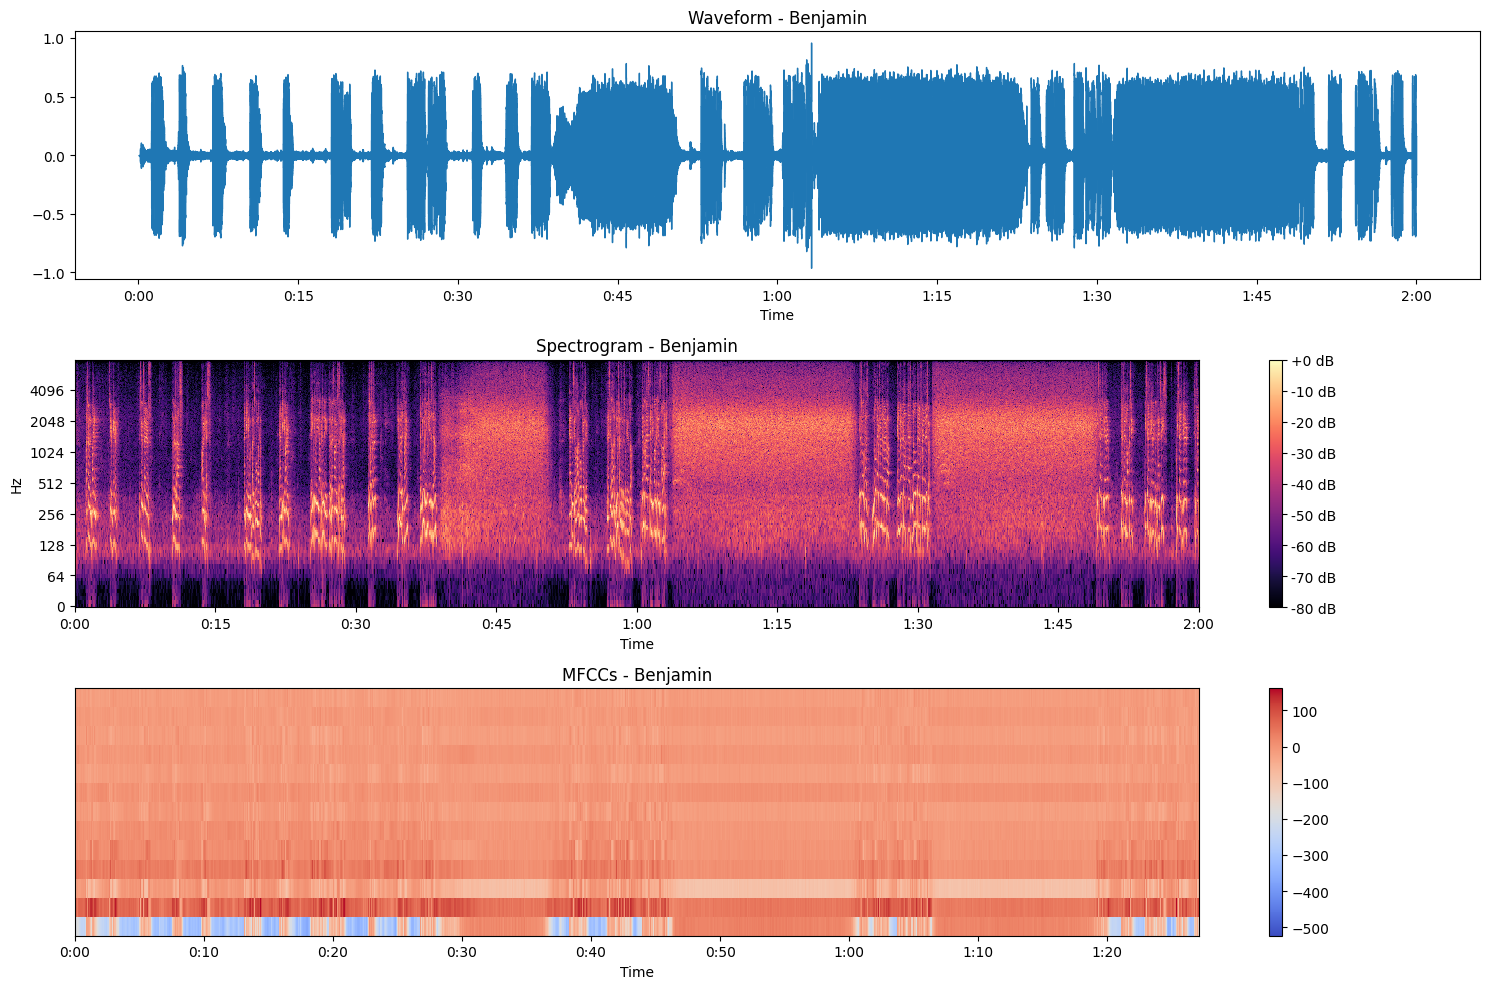

<ipython-input-12-ce48acd434ba>:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


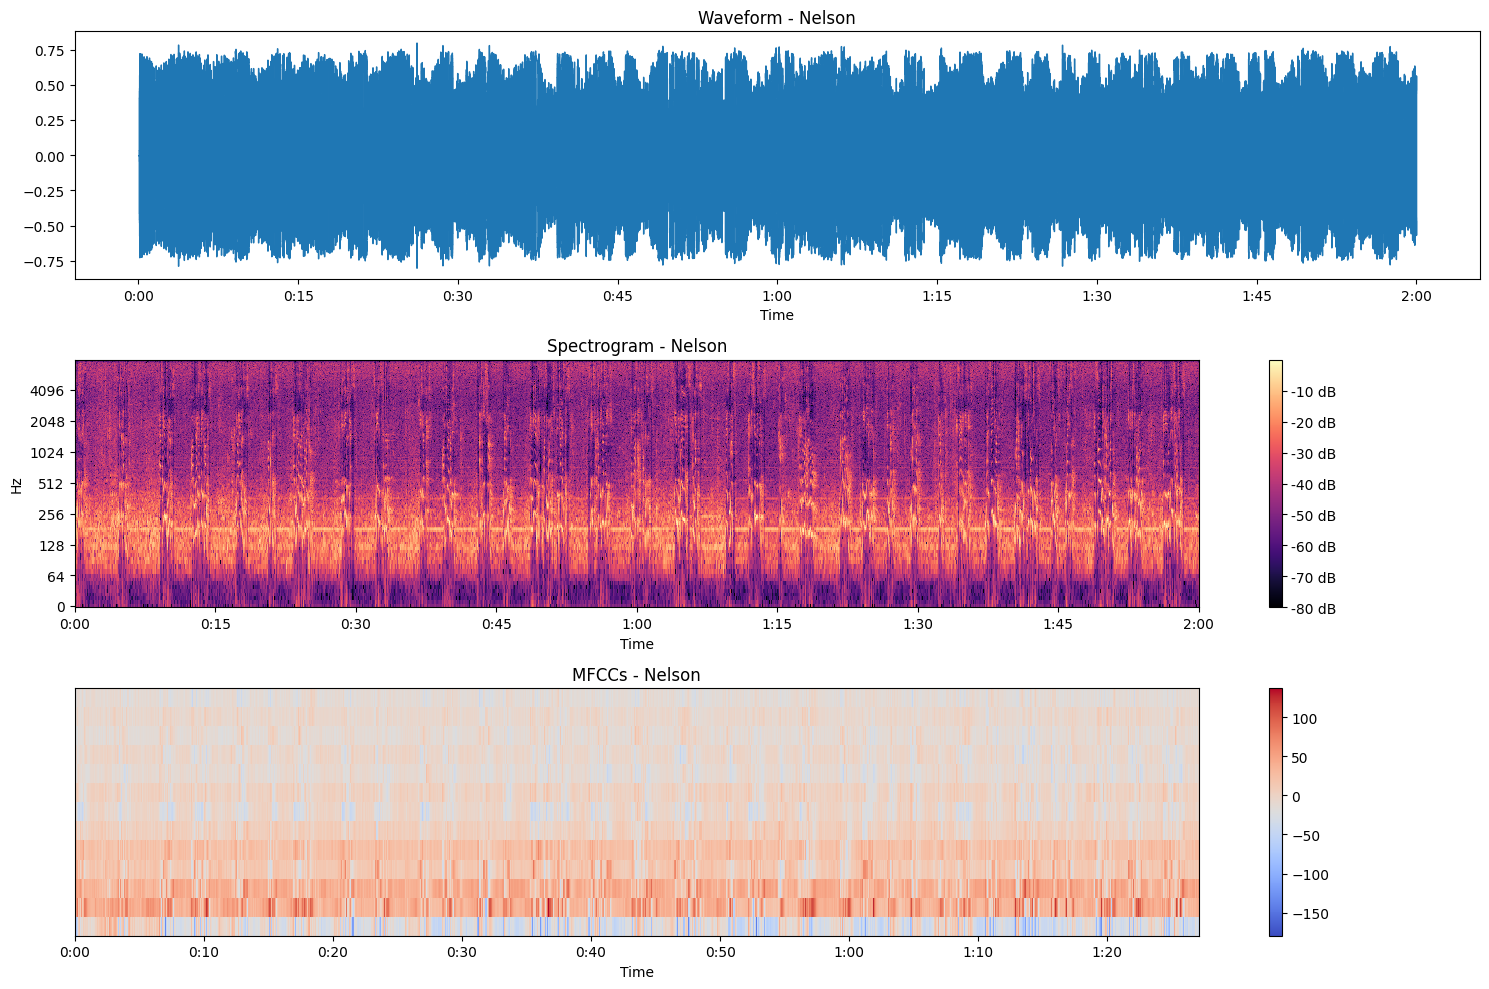

In [ ]:
import librosa.display

# Function to plot the waveform, spectrogram, and MFCCs
def plot_audio_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Extract speaker name from the file path
    speaker_name = os.path.basename(audio_path).split('_')[0]

    # Plot the waveform
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {speaker_name}')

    # Plot the spectrogram
    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {speaker_name}')

    # Plot the MFCCs
    plt.subplot(3, 1, 3)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {speaker_name}')

    plt.tight_layout()
    plt.show()

# Paths to the combined audio files
audio_paths = [
    '/content/combined_files/Benjamin_Netanyau_combined.wav',
    '/content/combined_files/Nelson_Mandela_combined.wav'
]

# Plot features for each audio file
for audio_path in audio_paths:
    plot_audio_features(audio_path)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Set the parent directory for speaker folders
parent_dir = "/content/speaker-recognition-dataset/16000_pcm_speeches"

# List of speaker folders
speaker_folders = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]

def extract_features(parent_dir, speaker_folders):
    features = []
    labels = []

    for i, speaker_folder in enumerate(speaker_folders):
        speaker_folder_path = os.path.join(parent_dir, speaker_folder)

        for filename in os.listdir(speaker_folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(speaker_folder_path, filename)
                audio, sr = librosa.load(file_path, sr=None, duration=1)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

                # Normalize MFCC features
                mfccs = StandardScaler().fit_transform(mfccs)

                features.append(mfccs.T)
                labels.append(i)

    return np.array(features), np.array(labels)

# Extract features and labels
X, y = extract_features(parent_dir, speaker_folders)

In [ ]:
for feature in X[:1]:
    print(feature)

[[-3.40574884e+00  8.39246273e-01  2.99406648e-01  4.32628006e-01
   3.40520769e-01  2.69453555e-01  2.41854757e-01  2.50890702e-01
   1.56915754e-01  1.43674508e-01  1.64507806e-01  1.63739637e-01
   1.02910429e-01]
 [-3.38771558e+00  9.09013748e-01  2.56371409e-01  4.87825125e-01
   3.55718046e-01  2.76700199e-01  2.24584520e-01  2.28099242e-01
   1.22992255e-01  1.71920419e-01  1.39711410e-01  1.23874232e-01
   9.09049287e-02]
 [-3.39466166e+00  8.75876248e-01  2.89422214e-01  4.81895179e-01
   3.23938131e-01  2.87076354e-01  2.30494514e-01  2.40333810e-01
   1.36483744e-01  1.77853867e-01  1.44431770e-01  1.37874588e-01
   6.89812526e-02]
 [-3.40001893e+00  8.55209649e-01  3.01118255e-01  4.81550157e-01
   2.68042862e-01  2.95531482e-01  2.25326166e-01  2.68698245e-01
   1.39174908e-01  1.75652951e-01  1.62543505e-01  1.39297619e-01
   8.78730342e-02]
 [-3.39295530e+00  8.37034643e-01  3.22677076e-01  5.51945388e-01
   3.02902937e-01  3.18454295e-01  1.89493671e-01  2.75264651e-01


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Encode labels with explicit classes
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
label_encoder.classes_ = np.array(speaker_folders)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of training and validation data
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)

Training Data Shape: (5250, 32, 13)
Validation Data Shape: (1125, 32, 13)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.6887 - loss: 0.7917 - val_accuracy: 0.9342 - val_loss: 0.1949
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9158 - loss: 0.2231 - val_accuracy: 0.9253 - val_loss: 0.1872
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9029 - loss: 0.2505 - val_accuracy: 0.9644 - val_loss: 0.0993
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9598 - loss: 0.1131 - val_accuracy: 0.9662 - val_loss: 0.1009
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9642 - loss: 0.0956 - val_accuracy: 0.9689 - val_loss: 0.1028
Early stopping triggered at epoch 5


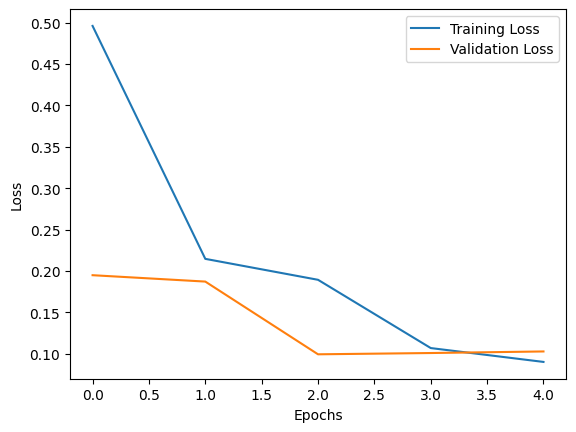

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(speaker_folders), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])

# Check if EarlyStopping triggered
if early_stopping.stopped_epoch > 0:
    print("Early stopping triggered at epoch", early_stopping.stopped_epoch + 1)
else:
    print("Training completed without early stopping")

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Test Evaluation Accuracy: 0.9680284191829485
Weighted F1 Score: 0.9678702150341644


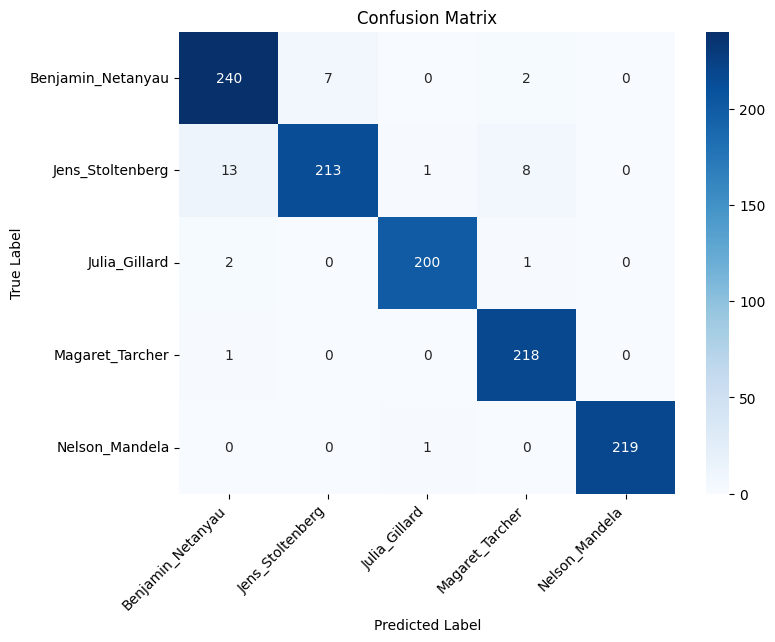

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

# Evaluate the model on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Decode labels back to original format
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=speaker_folders)

# Calculate accuracy
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Test Evaluation Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_test_decoded, y_pred_decoded, labels=speaker_folders, average='weighted')
print(f"Weighted F1 Score: {f1}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Speaker: Jens_Stoltenberg


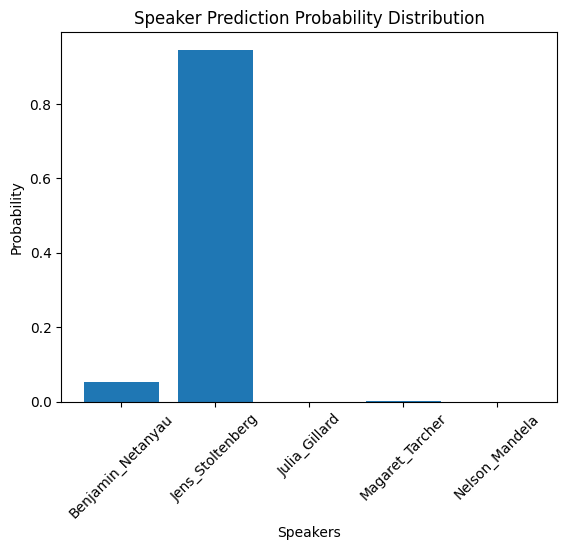

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def preprocess_audio(file_path, n_mfcc=13, max_pad_len=X_train.shape[1]):
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050)

        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

        pad_width = max_pad_len - mfccs.shape[1]
        if pad_width > 0:
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :max_pad_len]


        mfccs = (mfccs - np.mean(mfccs)) / np.std(mfccs)

        mfccs = np.expand_dims(mfccs.T, axis=0)
        return mfccs
    except Exception as e:
        print(f"Error in preprocessing the audio file: {e}")
        return None


def predict_speaker_from_file(file_path):
    features = preprocess_audio(file_path)

    if features is None:
        print("Could not process the input file.")
        return

    predictions = model.predict(features)
    predicted_index = np.argmax(predictions)

    predicted_speaker = label_encoder.inverse_transform([predicted_index])[0]

    print(f"Predicted Speaker: {predicted_speaker}")

    plt.bar(range(len(speaker_folders)), predictions[0])
    plt.xticks(range(len(speaker_folders)), speaker_folders, rotation=45)
    plt.xlabel('Speakers')
    plt.ylabel('Probability')
    plt.title('Speaker Prediction Probability Distribution')
    plt.show()

input_wav_file = "/content/speaker-recognition-dataset/16000_pcm_speeches/Benjamin_Netanyau/0.wav"

predict_speaker_from_file(input_wav_file)
